In [1]:
pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bca653afd83144c0a29c82b68d203a58863763db8b17415c33fd400ddf598a57
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# **1. Entendimento do Negócio**

### Quero Vender um Seguro de Vida!
▶
- Preciso mapear o meu cliente
- Previsão da renda do cliente
- Analizar possivel clientes, fazer produto, vendas e pós vendas
- Dados disponível arquivo 'Previsão de renda.csv' dos clientes

✈

# **2. Entendimento dos Dados**

- Dados vem de um arquivo interno:::
- Dados contém as seguintes colunas: Imagem abixo : ⬇
- Contém 15 coluna e 15.000 linhas
- Dados com ID de cada cliente contendo patrimonio, educação, renda, sexo e etc.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import ydata_profiling
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-2-2d03539cda04>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
df = pd.read_csv('/content/previsao_de_renda.csv')

In [4]:
df.head(10)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
5,5,2015-01-01,10581,F,False,True,0,Assalariado,Superior completo,Casado,Casa,39,4.345205,2.0,1445.87
6,6,2015-01-01,7129,F,False,True,0,Empresário,Superior completo,Viúvo,Casa,55,6.378082,1.0,1726.03
7,7,2015-01-01,9952,F,False,True,0,Empresário,Secundário,Casado,Casa,36,3.104110,2.0,2515.98
8,8,2015-01-01,883,F,False,True,0,Assalariado,Secundário,Casado,Casa,50,18.605479,2.0,3420.34
9,9,2015-01-01,8070,M,True,True,0,Assalariado,Superior completo,Casado,Casa,60,10.558904,2.0,12939.14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [6]:
df.describe()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


✈

# 3. **Preparação dos dados**

### Fatores que Influência a compra?

▶

- Educação
- Patrimonio
- Renda
- Experiencia de Trabalho

▶

- Regressão linear

▶

- Dados ausentes ou enviesados
- Constrir um DataFrame unico
- Melhor escala dos dados


In [7]:
# Selecionar colunas específicas
df[['posse_de_veiculo', 'posse_de_imovel', 'renda', 'tempo_emprego', 'educacao']]

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao
0,False,True,8060.34,6.602740,Secundário
1,True,True,1852.15,7.183562,Superior completo
2,True,True,2253.89,0.838356,Superior completo
3,False,True,6600.77,4.846575,Superior completo
4,True,False,6475.97,4.293151,Secundário
...,...,...,...,...,...
14995,False,True,7990.58,13.887671,Secundário
14996,False,True,10093.45,NaN,Superior completo
14997,True,True,604.82,7.832877,Superior completo
14998,True,False,3352.27,4.298630,Superior completo


In [8]:
cliente = df[['posse_de_veiculo', 'posse_de_imovel', 'renda', 'tempo_emprego', 'educacao']]

In [9]:
# Tratar Valores Ausentes
cliente.dropna()

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao
0,False,True,8060.34,6.602740,Secundário
1,True,True,1852.15,7.183562,Superior completo
2,True,True,2253.89,0.838356,Superior completo
3,False,True,6600.77,4.846575,Superior completo
4,True,False,6475.97,4.293151,Secundário
...,...,...,...,...,...
14994,True,False,1592.57,9.849315,Superior incompleto
14995,False,True,7990.58,13.887671,Secundário
14997,True,True,604.82,7.832877,Superior completo
14998,True,False,3352.27,4.298630,Superior completo


In [10]:
# Tratar valores NaN
cliente.fillna(0)

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao
0,False,True,8060.34,6.602740,Secundário
1,True,True,1852.15,7.183562,Superior completo
2,True,True,2253.89,0.838356,Superior completo
3,False,True,6600.77,4.846575,Superior completo
4,True,False,6475.97,4.293151,Secundário
...,...,...,...,...,...
14995,False,True,7990.58,13.887671,Secundário
14996,False,True,10093.45,0.000000,Superior completo
14997,True,True,604.82,7.832877,Superior completo
14998,True,False,3352.27,4.298630,Superior completo


In [11]:
# Juntando as colunas (soma)
cliente['patrimonio'] = cliente['posse_de_veiculo'] + cliente['posse_de_imovel']

<ipython-input-11-cbbd5f81874e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['patrimonio'] = cliente['posse_de_veiculo'] + cliente['posse_de_imovel']


In [12]:
# Número de Nan
cliente['tempo_emprego'].isna().sum()

2573

In [13]:
# mapa booleano que indique onde estão os valores NaN:
cliente.isna()

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao,patrimonio
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
14995,False,False,False,False,False,False
14996,False,False,False,True,False,False
14997,False,False,False,False,False,False
14998,False,False,False,False,False,False


In [14]:
# Transformar a coluna de bool para int
cliente['patrimonio'] = cliente['patrimonio'].astype(int)
cliente['renda'] = cliente['renda'].astype(int)

<ipython-input-14-d43b1417a148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['patrimonio'] = cliente['patrimonio'].astype(int)
<ipython-input-14-d43b1417a148>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['renda'] = cliente['renda'].astype(int)


In [15]:
# Primeiro preencha os valores NaN com um número inteiro adequado (e.g., 0 or -1)
cliente['tempo_emprego'] = cliente['tempo_emprego'].fillna(0).astype(int)

<ipython-input-15-cd87aaaa8e77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['tempo_emprego'] = cliente['tempo_emprego'].fillna(0).astype(int)


In [16]:
# Transformar a coluna de bool para int
cliente['tempo_emprego'] = cliente['tempo_emprego'].astype(int)

<ipython-input-16-4ca2df32269b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['tempo_emprego'] = cliente['tempo_emprego'].astype(int)


In [17]:
# Retorna todos os valores únicos presentes em uma coluna.
cliente['educacao'].unique()

array(['Secundário', 'Superior completo', 'Superior incompleto',
       'Primário', 'Pós graduação'], dtype=object)

In [18]:
# Exemplo de coluna com 5 valores distintos
cliente['educacao'] = cliente['educacao'].map({
    'Secundário': 1,
    'Superior completo': 2,
    'Superior incompleto': 3,
    'Primário': 4,
    'Pós graduação': 5,
})


<ipython-input-18-b634d7804736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['educacao'] = cliente['educacao'].map({


In [19]:
# Transformar a coluna de object para int
cliente['educacao'] = cliente['educacao'].astype(int)

<ipython-input-19-e3005ef3f37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['educacao'] = cliente['educacao'].astype(int)


In [20]:
cliente.dtypes

,0
posse_de_veiculo,bool
posse_de_imovel,bool
renda,int64
tempo_emprego,int64
educacao,int64
patrimonio,int64


In [21]:
cliente.head(10)

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao,patrimonio
0,False,True,8060,6,1,1
1,True,True,1852,7,2,1
2,True,True,2253,0,2,1
3,False,True,6600,4,2,1
4,True,False,6475,4,1,1
5,False,True,1445,4,2,1
6,False,True,1726,6,2,1
7,False,True,2515,3,1,1
8,False,True,3420,18,1,1
9,True,True,12939,10,2,1


In [22]:
prof = ProfileReport(cliente, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
cliente['educacao'].isna().sum()

0

In [24]:
# Calcular a média de Patrimonio por Educação
cliente['media'] = cliente[['patrimonio', 'educacao']].mean(axis=1)

# salvar em uma nova variável
media = cliente['media']

<ipython-input-24-3f58b5c70170>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['media'] = cliente[['patrimonio', 'educacao']].mean(axis=1)


{1: 'Secundário', 2: 'Superior completo', 3: 'Superior incompleto', 4: 'Primário', 5: 'Pós graduação'}


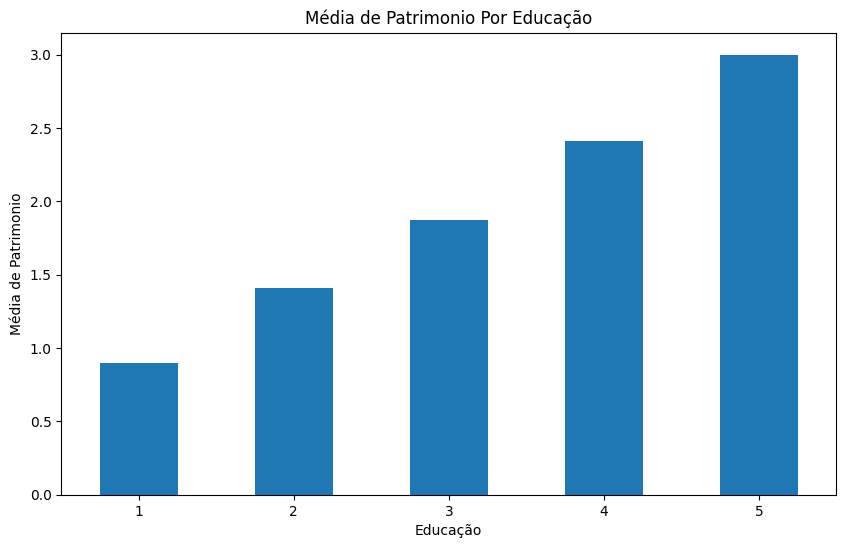

In [25]:
# Agrupe por nível de escolaridade e calcule a média
media = cliente.groupby('educacao')['media'].mean()

# Definir a ordem das barras
ordem = {1:'Secundário', 2:'Superior completo', 3:'Superior incompleto', 4:'Primário', 5:'Pós graduação'}
plt.figure(figsize=(10, 6))
print(ordem)

# Gráfico de barras com ordem especificada
media.plot(kind='bar')
plt.ylabel('Média de Patrimonio')
plt.xlabel('Educação')
plt.title('Média de Patrimonio Por Educação')
plt.xticks(rotation=1)
plt.show()

In [26]:
# Calcular a média de Patrimonio por Educação
cliente['media_renda'] = cliente[['renda', 'tempo_emprego']].mean(axis=1)

# salvar em uma nova variável
media_renda = cliente['media_renda']

<ipython-input-26-677a4549ef8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['media_renda'] = cliente[['renda', 'tempo_emprego']].mean(axis=1)


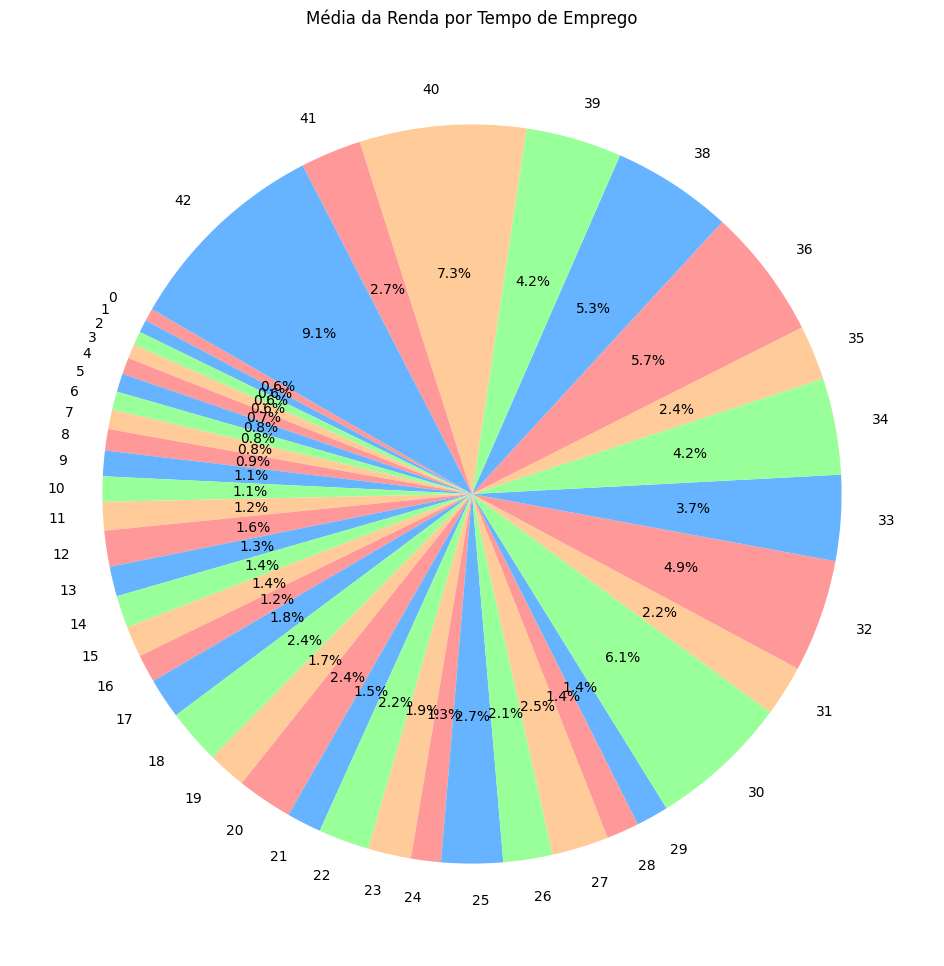

In [27]:
# Calculando a média de renda por tempo de emprego
media_renda = cliente.groupby('tempo_emprego')['media_renda'].mean()

# Criando o gráfico de pizza
plt.figure(figsize=(16, 12))
plt.pie(media_renda, labels=media_renda.index, autopct='%1.1f%%', startangle=150, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Adicionando título
plt.title('Média da Renda por Tempo de Emprego')

# Mostrando o gráfico
plt.show()

Text(0.5, 0, 'Média de Renda')

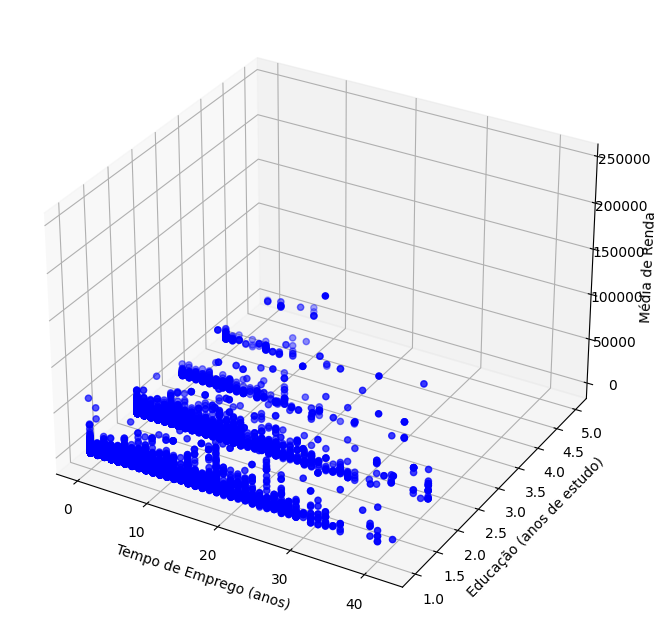

In [28]:
# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definindo os eixos
tempo_emprego = cliente['tempo_emprego']
# Convertendo a coluna 'educacao' para valores numéricos
educacao_num = cliente['educacao'].replace({'Secundário': 1, 'Superior completo': 2, 'Superior incompleto': 3, 'Primário': 4, 'Pós graduação': 5})
renda = cliente['renda']

# Plotando os pontos em 3D
ax.scatter(tempo_emprego, educacao_num, renda, c='b', marker='o')

# Definindo rótulos
ax.set_xlabel('Tempo de Emprego (anos)')
ax.set_ylabel('Educação (anos de estudo)')
ax.set_zlabel('Média de Renda')

✈

# **4. Modelagem dos dados**

**Arte X Ciência**
- Tecnicas regressão linear
- Organização da tecnicas
- O que vou fazer

✈

### **Regressão Linear**

In [29]:
# Separando as variáveis independentes (Tempo de Emprego, Educação) e a variável dependente (Renda)
X = cliente[['tempo_emprego', 'educacao']]  # Features (variáveis independentes)

# Convertendo a coluna 'educacao' para numérica usando one-hot encoding
X = pd.get_dummies(X, columns=['educacao'])

y = cliente['renda']  # Target (variável dependente)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()

# Imputando valores ausentes com a média
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # crie um objeto impuador com estratégia = média
X_train = imputer.fit_transform(X_train) # ajuste o imputer para X_train e transforme X_train

modelo.fit(X_train, y_train)

LinearRegression()

In [30]:
# Fazendo previsões com os dados de teste
# Imputar valores ausentes em X_test usando o mesmo impuador instalado em X_train
X_test = imputer.transform(X_test)
y_pred = modelo.predict(X_test)

In [31]:
# Avaliando o modelo (usando o erro quadrático médio - RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Erro Quadrático Médio (RMSE): {rmse}')

Erro Quadrático Médio (RMSE): 6418.922539520283


In [32]:
# Coeficientes do modelo (importância de cada variável)
print('Coeficientes do modelo:', modelo.coef_)
print('Intercepto do modelo:', modelo.intercept_)

Coeficientes do modelo: [ 490.24932224   28.37137618  352.02363502 -668.90231962  219.88453748
   68.62277094]
Intercepto do modelo: 2628.195087480616


In [33]:
# Fazendo uma previsão para novos valores de Tempo de Emprego e Educação
# Você precisa criar um novo ponto de dados com o mesmo número de recursos que os dados de treinamento
novo_dado = [[10, 0, 0, 1, 0, 0]]  # Exemplo: 10 anos de emprego, a categoria 'educacao' precisa corresponder às colunas codificadas one-hot usadas durante o treinamento
renda_prevista = modelo.predict(novo_dado)
print(f'Renda prevista para 10 anos de emprego e 18 anos de educação: {renda_prevista[0]:.2f}')

Renda prevista para 10 anos de emprego e 18 anos de educação: 6861.79


In [34]:
# Fazendo uma previsão para 18 anos de emprego e 10 anos de educação
# Você precisa incluir todos os 6 recursos na mesma ordem que seus dados de treinamento
novo_dado1 = [[18, 10, 0, 0, 1, 0]]  # Exemplo: 18 anos de emprego, 10 anos de educação e as demais features.
# Certifique-se que os valores para as outras features estejam corretos e na mesma ordem que os dados de treinamento
renda_prevista1 = modelo.predict(novo_dado1)

print(f'Renda prevista para 18 anos de emprego e 10 anos de educação: {renda_prevista1[0]:.2f}')

Renda prevista para 18 anos de emprego e 10 anos de educação: 11956.28


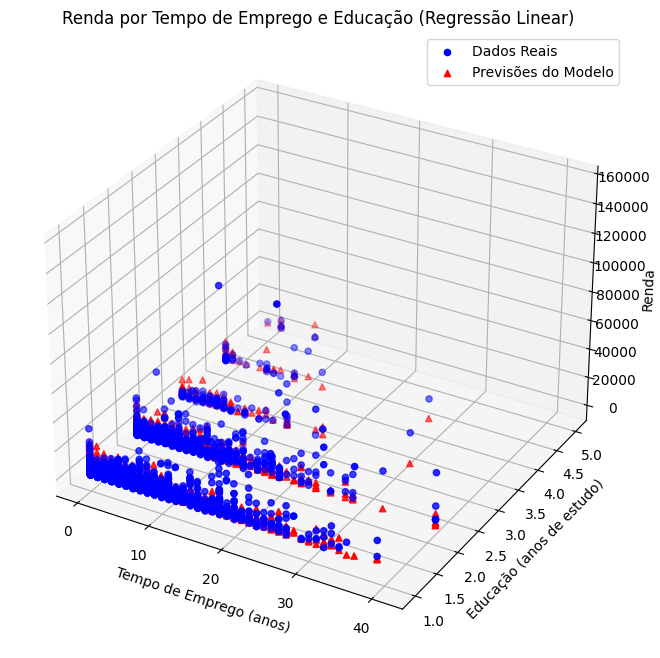

In [35]:
# Gráfico 3D com os dados reais e as previsões do modelo
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os dados reais
ax.scatter(cliente['tempo_emprego'][:3000], cliente['educacao'][:3000], cliente['renda'][:3000], c='b', marker='o', label='Dados Reais')

# Plotando as previsões do modelo
ax.scatter(cliente['tempo_emprego'][:3000], cliente['educacao'][:3000], y_pred, c='r', marker='^', label='Previsões do Modelo')
# Observe que estamos fatiando os primeiros 3.000 valores dos arrays 'tempo_emprego', 'educacao' e 'renda' para corresponder ao formato de 'y_pred'.

# Definindo rótulos
ax.set_xlabel('Tempo de Emprego (anos)')
ax.set_ylabel('Educação (anos de estudo)')
ax.set_zlabel('Renda')

# Título do gráfico
ax.set_title('Renda por Tempo de Emprego e Educação (Regressão Linear)')

# Legenda
ax.legend()

# Mostrando o gráfico
plt.show()

In [36]:
cliente.head(10)

,posse_de_veiculo,posse_de_imovel,renda,tempo_emprego,educacao,patrimonio,media,media_renda
0,False,True,8060,6,1,1,1.0,4033.0
1,True,True,1852,7,2,1,1.5,929.5
2,True,True,2253,0,2,1,1.5,1126.5
3,False,True,6600,4,2,1,1.5,3302.0
4,True,False,6475,4,1,1,1.0,3239.5
5,False,True,1445,4,2,1,1.5,724.5
6,False,True,1726,6,2,1,1.5,866.0
7,False,True,2515,3,1,1,1.0,1259.0
8,False,True,3420,18,1,1,1.0,1719.0
9,True,True,12939,10,2,1,1.5,6474.5


In [37]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   posse_de_veiculo  15000 non-null  bool   
 1   posse_de_imovel   15000 non-null  bool   
 2   renda             15000 non-null  int64  
 3   tempo_emprego     15000 non-null  int64  
 4   educacao          15000 non-null  int64  
 5   patrimonio        15000 non-null  int64  
 6   media             15000 non-null  float64
 7   media_renda       15000 non-null  float64
dtypes: bool(2), float64(2), int64(4)
memory usage: 732.5 KB


In [38]:
cliente.mean()

,0
posse_de_veiculo,0.390667
posse_de_imovel,0.676200
renda,5696.790000
tempo_emprego,5.989600
educacao,1.472800
patrimonio,0.805933
media,1.139367
media_renda,2851.389800


✈

# **5. Avaliação dos Resultados**

### **Mapa do cliente**
⚾ **Perfil:**

**Renda: $ 5.696**

**Patrimonio: 1 Casa**

**Tempo de Emprego: 6 ANOS**

**Educação: Secundário**



### **Métrica de Perfil**
**⚾**

**Renda prevista para 10 anos de emprego e 18 anos de educação: $ 6.862**

**Renda prevista para 18 anos de emprego e 10 anos de educação: $ 11.956**

**Diferença entre tempo de emprego X educação é: $ 5094**




### **Informações adicionais**
**⚾**
**Custo Media Brasil: Entre 3% e 5% renda mensal**

**Renda Mais alta: 1°- Tempo de Serviço e 2°- Pós Graduação**

**Patrimonio: 1- Imovel**

**Custo do Seguro a 3%: $ 171**

✈

# **6. Implantação**


- Vai ser utilizado como métricas de preço do mercado
- StorTelling
- Indicadores vai ser a acurácia de clientes
- Revisão do projeto a cada ano

# **Exploração e Arquitetura do CRISP-DM no Previsão de Renda**
## Este notebook faz parte do Módulo 16 da EBAC.

# **Dados:**
## Os dados representam informação de clientes e contam com as seguintes colunas:
- **Data de referência**
- **Sexo**
- **Posse de veículo**
- **Posse de imóvel**
- **Qtd de filhos**
- **Tipo de renda**
- **Educação**
- **Estado civil**
- **Tipo de Residencia**
- **Idade**
- **Tempo de emprego**
- **Qtd de pessoas na residencia**
- **Renda**

# **Exploração de Dados:**
## A primeira fase da análise é entender o que tem na materia prima. Vamos explorar os dados:

**Qual a quantidade de informação temos na base de dados?**

### df = pd.read_csv('previsao_de_renda.csv')

◼ Resposta: 15000 linhas

**ps:** A base de dados acima contém 15000 linhas e 15 colunas, para este projeto foi utilazado somente 5 colunas no método CRISP-DM.

**Como são os dados?**

/content/dados_img.png

**Quais tipos de cada dado?**

/content/tipos_img.png

Agora que já entedemos quais são os tipos de dados, vamos olhar mais atentamente para as variáveis que não são numericas.

**Quais são os tipos de escolaridade no dataset?**

/content/educacao_img.png

Terei que transfomar está coluna em int para cosenguir calcular

**Quais colunas vai utilizar?**

Vou utilizar 4 colunas 'educacao', 'renda', 'tempo_emprego' e 'patrimonio'
que é a soma das duas colunas (posse_de_veiculo) e (posse_de_imovel).

**Qual é finalidade do Método CRISP-DM?**

/content/Método CRISP-DM_img.png

O CRISP-DM metodologia ágil para o planejamento de projetos de análise, mineração e Machine Learning de dados.


# **Analise de Dados**
Analisei que o grau de escolaridade influencia na renda

**Qual é média de Patrimonio por Educação?**

/content/media patrimonio_img.png

A imgem acima mostra que tem Pós Gradução ganha mais que os demais niveis
de escolaridade.

**Tem outro paremetro para quem não tem Pós Graduação?**

/content/valor status_img.png

Sim, é o tempo de emprego que mais influência na renda quando mais tempo
maior sálario.

**Qual é Renda por Tempo de Emprego e Educação (Regressão Linear)?**

/content/Gráfico 3D att.png

A Regressão Linear mostra os Dados Reais X Previsões do Modelo,
Usado 3 Variáveis Tempo de Emprego, Educação e Renda. A Educação tem a seginte legenda:

{1:'Secundário', 2:'Superior completo', 3:'Superior incompleto', 4:'Primário', 5:'Pós graduação'}

# **Conclusão**
⚾ **Perfil:**

**Renda: $ 5.696**

**Patrimonio: 1 Casa**

**Tempo de Emprego: 6 ANOS**

**Educação: Secundário**



### **Métrica de Perfil**
**⚾**

**Renda prevista para 10 anos de emprego e 18 anos de educação: $ 6.862**

**Renda prevista para 18 anos de emprego e 10 anos de educação: $ 11.956**

**Diferença entre tempo de emprego X educação é: $ 5094**




### **Informações adicionais**
**⚾**
**Custo Media Brasil: Entre 3% e 5% renda mensal**

**Renda Mais alta: 1°- Tempo de Serviço e 2°- Pós Graduação**

**Patrimonio: 1- Imovel**

**Custo do Seguro a 3%: $ 171**
